In [57]:
from selenium import webdriver
driver = webdriver.Chrome('../../driver/chromedriver.exe')

In [58]:
driver.get('http://naver.com') # webdriver를 활용한 url 접속하기

In [52]:
html = driver.page_source
html

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="svgless"><head>\n<meta charset="utf-8" />\n<meta name="Referrer" content="origin" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="viewport" content="width=1100" />\n<meta name="apple-mobile-web-app-title" content="NAVER" />\n<meta name="robots" content="index,nofollow" />\n<meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" />\n<meta property="og:title" content="네이버" />\n<meta property="og:url" content="http://www.naver.com/" />\n<meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" />\n<meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" />\n<meta name="twitter:card" content="summary" />\n<meta name="twitter:title" content="" />\n<meta name="twitter:url" conten

In [59]:
elem_login = driver.find_element_by_id('id')
elem_login.clear() #기존에 입력했던 값 지우기
elem_login.send_keys('sky00gpals')

elem_login = driver.find_element_by_id('pw')
elem_login.clear()
elem_login.send_keys('tkfkdgk5610')

In [60]:
# xpath: javascript를 활용하기 위한 웹페이지 내용을 xml 형식으로 보여준다
xpath='''//*[@id="frmNIDLogin"]/fieldset/span/input''' # xpath copy 문자열로 복사
driver.find_element_by_xpath(xpath).click()

In [61]:
driver.get('http://mail.naver.com')

In [62]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

raw_list = soup.find_all('div','name _ccr(lst.from) ')
raw_list

[<div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|5984) _stopDefault" href="#" title='"네이버" &lt;help@help.naver.com&gt;'>네이버</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|5977) _stopDefault" href="#" title='"소한준" &lt;realso0@naver.com&gt;'>소한준</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|5953) _stopDefault" href="#" title='"경희대학교총동문회" &lt;khua2001@hanmail.net&gt;'>경희대학교총동문회</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|5944) _stopDefault" href="#" title='"경희대학교총동문회" &lt;khua2001@hanmail.net&gt;'>경희대학교총동문회</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|5941) _stopDefaul

In [63]:
# send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
# send_list

In [64]:
send_list = [raw_list[n].a['title'] for n in range(0, len(raw_list))]
send_list

['"네이버" <help@help.naver.com>',
 '"소한준" <realso0@naver.com>',
 '"경희대학교총동문회" <khua2001@hanmail.net>',
 '"경희대학교총동문회" <khua2001@hanmail.net>',
 '"극동방송" <mail@febc.kr>',
 '"Instagram" <no-reply@mail.instagram.com>',
 '"Instagram" <no-reply@mail.instagram.com>',
 '"SKTelecom" <bbsmaster@sk.com>',
 '"찬양한" <gksghkwls09@hanmail.net>',
 '"jae7415@gmail.com" <no-reply@evernote.com>',
 '"Instagram" <no-reply@mail.instagram.com>',
 '"박혜영" <88phy0629@naver.com>',
 '"박혜영" <88phy0629@naver.com>',
 '"경희대학교총동문회" <khua2001@hanmail.net>',
 '"사람인" <webmaster@mailinfo.saramin.co.kr>']

In [97]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
for i in range(2,11):
    str_i = str(i)
    xpath2='''//*[@id="'''+str_i+'''"]''' # xpath copy 문자열로 복사
    driver.find_element_by_xpath(xpath2).click()
    WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '''//*[@id="'''+str(int(str_i)-1)+'''"]''')))
    print(xpath2)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    raw_list = soup.find_all('div','name _ccr(lst.from) ')
    print(raw_list[0].text)
    
    tmp_send_list = [raw_list[n].a['title'] for n in range(0, len(raw_list))]
    
    send_list.extend(tmp_send_list)

//*[@id="2"]
보낸 이:noreply@ttitel.net
//*[@id="3"]
보낸 이:사람인 | 스크랩
//*[@id="4"]
보낸 이:찬양한
//*[@id="5"]
보낸 이:사람인 | 스크랩
//*[@id="6"]
보낸 이:샘표식품
//*[@id="7"]
보낸 이:kbstar
//*[@id="8"]
보낸 이:독금맨
//*[@id="9"]
보낸 이:한빛지기
//*[@id="10"]
보낸 이:noreply@ttitel.net


In [98]:
send_list

['"네이버" <help@help.naver.com>',
 '"소한준" <realso0@naver.com>',
 '"경희대학교총동문회" <khua2001@hanmail.net>',
 '"경희대학교총동문회" <khua2001@hanmail.net>',
 '"극동방송" <mail@febc.kr>',
 '"Instagram" <no-reply@mail.instagram.com>',
 '"Instagram" <no-reply@mail.instagram.com>',
 '"SKTelecom" <bbsmaster@sk.com>',
 '"찬양한" <gksghkwls09@hanmail.net>',
 '"jae7415@gmail.com" <no-reply@evernote.com>',
 '"Instagram" <no-reply@mail.instagram.com>',
 '"박혜영" <88phy0629@naver.com>',
 '"박혜영" <88phy0629@naver.com>',
 '"경희대학교총동문회" <khua2001@hanmail.net>',
 '"사람인" <webmaster@mailinfo.saramin.co.kr>',
 '"The Metropolitan Museum of Art" <met@e.metmuseum.org>',
 '"The Metropolitan Museum of Art" <met@e.metmuseum.org>',
 '"The Metropolitan Museum of Art" <met@e.metmuseum.org>',
 '"The Metropolitan Museum of Art" <met@e.metmuseum.org>',
 '"The Metropolitan Museum of Art" <met@e.metmuseum.org>',
 '"The Metropolitan Museum of Art" <met@e.metmuseum.org>',
 '"The Metropolitan Museum of Art" <met@e.metmuseum.org>',
 '"The Metropoli

In [99]:
import pandas as pd
df = pd.DataFrame({'보낸사람':send_list, 'count':1})

In [100]:
df

,count,보낸사람
0,1,"""네이버"" <help@help.naver.com>"
1,1,"""소한준"" <realso0@naver.com>"
2,1,"""경희대학교총동문회"" <khua2001@hanmail.net>"
3,1,"""경희대학교총동문회"" <khua2001@hanmail.net>"
4,1,"""극동방송"" <mail@febc.kr>"
5,1,"""Instagram"" <no-reply@mail.instagram.com>"
6,1,"""Instagram"" <no-reply@mail.instagram.com>"
7,1,"""SKTelecom"" <bbsmaster@sk.com>"
8,1,"""찬양한"" <gksghkwls09@hanmail.net>"
9,1,"""jae7415@gmail.com"" <no-reply@evernote.com>"


In [101]:
import numpy as np
mail_unique=pd.pivot_table(df, index=['보낸사람'], values=['count'], aggfunc=np.sum)
mail_best = mail_unique.sort_values(by='count', ascending=False)

In [103]:
mail_best

,count
보낸사람,
"""사람인"" <webmaster@mailinfo.saramin.co.kr>",20
"""경희대학교총동문회"" <khua2001@hanmail.net>",12
"""The Metropolitan Museum of Art"" <met@e.metmuseum.org>",10
"""네이버"" <help@help.naver.com>",9
"""사람인 | 스크랩"" <scraprecruit@mailinfo.saramin.co.kr>",8
"""tripsta.kr"" <no-reply@tripsta.kr>",5
"""Instagram"" <no-reply@mail.instagram.com>",5
"""SKTelecom"" <bbsmaster@sk.com>",5
"""위메프"" <no-reply@wemakeprice.com>",4


In [104]:
mail_best_top10=mail_best.head(10)

In [105]:
mail_best_top10

,count
보낸사람,
"""사람인"" <webmaster@mailinfo.saramin.co.kr>",20
"""경희대학교총동문회"" <khua2001@hanmail.net>",12
"""The Metropolitan Museum of Art"" <met@e.metmuseum.org>",10
"""네이버"" <help@help.naver.com>",9
"""사람인 | 스크랩"" <scraprecruit@mailinfo.saramin.co.kr>",8
"""tripsta.kr"" <no-reply@tripsta.kr>",5
"""Instagram"" <no-reply@mail.instagram.com>",5
"""SKTelecom"" <bbsmaster@sk.com>",5
"""위메프"" <no-reply@wemakeprice.com>",4


In [106]:
import platform #os 정보를 가져 올 수 있는 모듈
from matplotlib import font_manager, rc
# font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기
if platform.system() == 'Darwin':
 rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
 path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
 font_name = font_manager.FontProperties(fname=path).get_name()
 rc('font', family=font_name)
else:
 print('Unknown System... sorry~~~~')

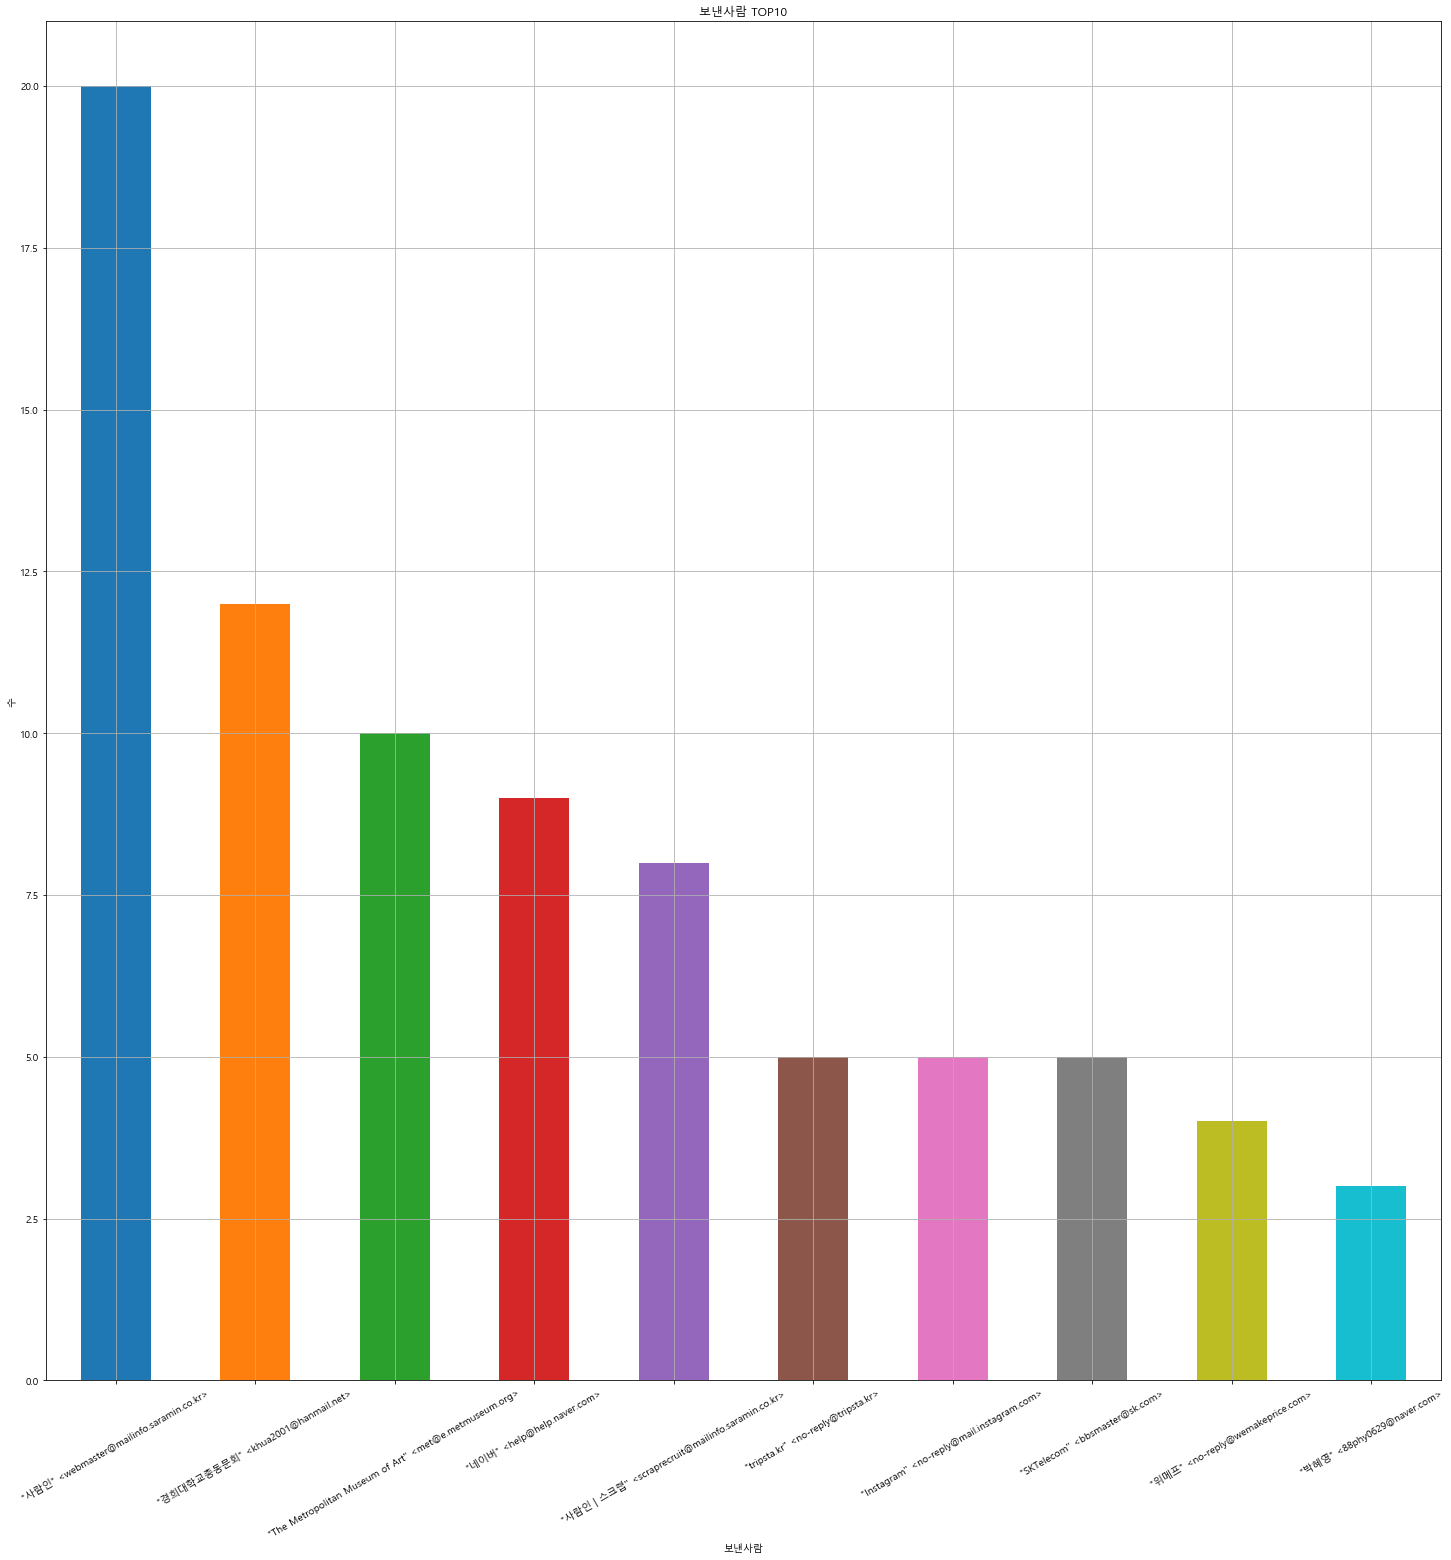

In [124]:
mail_best_top10['count'].plot(kind='bar', grid=True, figsize=(25,25))
plt.xlabel('보낸사람')
plt.ylabel('수')
plt.title('보낸사람 TOP10')
plt.xticks([0,1,2,3,4,5,6,7,8,9], rotation=30)
plt.show()